# Keras Basics

In [31]:
# You can safely ignore any warnings on importing this
# import keras
# from tensorflow import keras

from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Simple y=mx+b+noise data

In [32]:
m = 2
b = 3
x = np.linspace(0,50,100)

# 101 is an arbitrary choice to make sure your random values are same as mine!
np.random.seed(101) 
noise = np.random.normal(loc=0.0,scale=4.0,size=len(x))

In [33]:
y = 2*x + b + noise

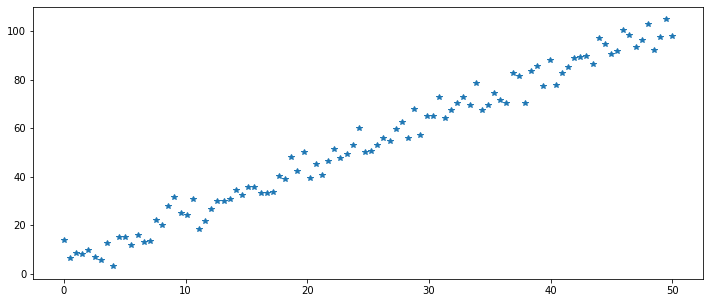

In [34]:
plt.figure(figsize=(12,5))
plt.plot(x,y,'*')

## Creating a Neural Network for a Line of Best Fit

In [35]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

In [54]:
model = Sequential()
# 4 Neurons, expecting only 1 feature with input_dim=1
model.add(Dense(4, input_dim=1, activation='relu'))
# 4 Neurons (Play around with this number!)
model.add(Dense(4, activation='relu'))
# One final output of y, so only 1 neuron
model.add(Dense(1, activation='linear'))
# Compil the layers
model.compile(loss='mse', optimizer='adam')

In [55]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 8         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


## Train on Data

** NOTE: FOR THIS SIMPLE EXAMPLE, I WILL SKIP THE TRAIN TEST SPLIT!!!! **

In [56]:
model.fit(x, y, epochs=200, verbose=1)

Train on 100 samples
Epoch 1/200
100/100 [==============================] - 0s 4ms/sample - loss: 2775.0023
Epoch 2/200
100/100 [==============================] - 0s 75us/sample - loss: 2757.3558
Epoch 3/200
100/100 [==============================] - 0s 86us/sample - loss: 2738.6767
Epoch 4/200
100/100 [==============================] - 0s 114us/sample - loss: 2720.4035
Epoch 5/200
100/100 [==============================] - 0s 111us/sample - loss: 2701.6780
Epoch 6/200
100/100 [==============================] - 0s 129us/sample - loss: 2682.6559
Epoch 7/200
100/100 [==============================] - 0s 140us/sample - loss: 2664.5209
Epoch 8/200
100/100 [==============================] - 0s 122us/sample - loss: 2644.0462
Epoch 9/200
100/100 [==============================] - 0s 116us/sample - loss: 2625.6226
Epoch 10/200
100/100 [==============================] - 0s 89us/sample - loss: 2605.4926
Epoch 11/200
100/100 [==============================] - 0s 106us/sample - loss: 2585.3662
Epo

100/100 [==============================] - 0s 104us/sample - loss: 21.3395
Epoch 185/200
100/100 [==============================] - 0s 93us/sample - loss: 21.1504
Epoch 186/200
100/100 [==============================] - 0s 95us/sample - loss: 20.9674
Epoch 187/200
100/100 [==============================] - 0s 117us/sample - loss: 20.8161
Epoch 188/200
100/100 [==============================] - 0s 112us/sample - loss: 20.6696
Epoch 189/200
100/100 [==============================] - 0s 109us/sample - loss: 20.5294
Epoch 190/200
100/100 [==============================] - 0s 105us/sample - loss: 20.3979
Epoch 191/200
100/100 [==============================] - 0s 95us/sample - loss: 20.2831
Epoch 192/200
100/100 [==============================] - 0s 95us/sample - loss: 20.1729
Epoch 193/200
100/100 [==============================] - 0s 93us/sample - loss: 20.0653
Epoch 194/200
100/100 [==============================] - 0s 93us/sample - loss: 19.9816
Epoch 195/200
100/100 [==================

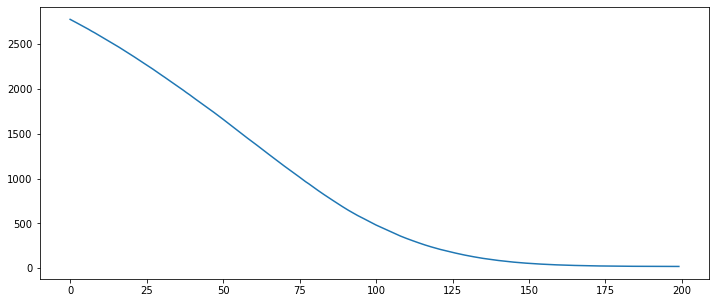

In [57]:
loss = model.history.history['loss']
epochs = range(len(loss))
# plot
plt.figure(figsize=(12,5))
plt.plot(epochs, loss)

## Predicting on new x points

Our previous x was 50 linspace points between 0 and 100. Let's predict for 1000 values between 0 and 100, drawing a line for our predictions (our line of best fit).

In [58]:
x_for_predictions = np.linspace(0,50,1000)

In [59]:
y_predicted = model.predict(x_for_predictions)

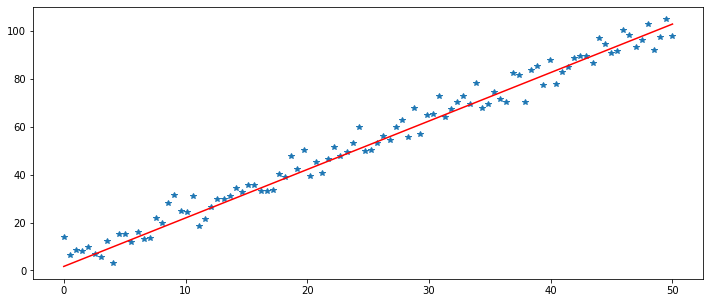

In [60]:
# Original X and Y
plt.figure(figsize=(12,5))
plt.plot(x,y,'*')
# Our Model's prediction Line
plt.plot(x_for_predictions,y_predicted,'r')

# Evaluating Our Error

In [61]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [62]:
# Labels we do know
prediction_for_true_y = model.predict(x)

In [63]:
mean_squared_error(y,prediction_for_true_y)

19.471843449856625

In [64]:
mean_absolute_error(y,prediction_for_true_y)

3.611589175674679

 Notice how MSE value was being reported out by Keras during training!
 
 Is this a good error value? Really depends on the context, refer back to our model evaluation lecture for full details!

-----